# Introduction

We aim to predict the likelihood of a patient testing positive for COVID-19 with given oxygen rate (SpO2), pulse rate (BPM), and body temperature (°F). Predicting whether a patient is likely to have COVID-19 or not will be extremely useful to the healthcare industry so that they can prepare beds in advance for patients and also prevent the spread of COVID-19 by taking precautionary measures sooner. This would also reduce the burden on areas which have a shortage of RT-PCR tests so that only patients that our model predicts as likely to have COVID-19 will be recommended to get a test. 

Link to dataset on Kaggle: https://urldefense.proofpoint.com/v2/url?u=https-3A__www.kaggle.com_rishanmascarenhas_covid19-2Dtemperatureoxygenpulse-2Drate-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=uTaA5_36FQxJV_w-tu3MIQ&m=Bw7waUOjy4tm1IGNjcl8cttP4Y4KMVMsbfpVSXxg2n4&s=s9O3P-R4ICVo9qsqP7XPi_89F3vNpDGY5lWDS4327Bc&e= 
This dataset from Kaggle has data including oxygen level, pulse rate, body temperature values for each patient. The number of observations in this dataset is n=10000 and the number of predictors is p=3. We hypothesize that there is indeed a relationship between the three key physical indexes: oxygen level, pulse rate, and temperature and the Outcome (likelihood of patient having COVID-19 based on our model). 

After performing some data cleaning and relabelling, we have 5 columns: Patient ID, Oxygen_Level, Pulse, Temperature, and Outcome. The Patient ID we used does not have any information which can be traced back to the patient which protects their information. In the ‘Outcome’ column, a ‘1’ implies that the patient tested positive, and a ‘0’ means the patient tested negative for COVID-19.



# Methods

We will be using a Logistic Regression model to focus on predicting the probability of a patient having COVID-19. We decided to use Logistic Regression due to the fact that it is most effective when used on binary data or outcomes. Since we are trying to predict a binary outcome (Positive or Negative), we expect to see a high accuracy from this model. Moreover, we have a relatively large sample size of 10000, which should allow the logistic regression model to perform well on this dataset. Logistic regression is a useful tool when variables in the dataset are linearly separable and as shown in Figure #1, there is a clear linear separation between positive and negative COVID-19 cases with ‘Pulse’ against ‘Oxygen_Level’. 

We will be using cross validation to evaluate the accuracy, sensitivity and specificity of our model against a test set. For our validation dataset, we decided to use a 50-50 split between test and training data. First, we shuffled the dataset to ensure that the 50-50 split is entirely random. 

Since we are not focusing on inference, we also plan on using multiple regression, which could lead to better predictions on the test set by uncovering relationships that logistic regression may not have been able to find.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from math import e

In [2]:
data = pd.read_csv('qt_dataset.csv')
data.columns = ['Patient ID', 'Oxygen_Level', 'Pulse', 'Temperature', 'Outcome']

data['Outcome'].replace(['Negative','Positive'],[0, 1],inplace=True)
data


,Patient ID,Oxygen_Level,Pulse,Temperature,Outcome
0,0,98,65,95,0
1,1,96,92,95,0
2,2,95,92,99,0
3,3,97,56,96,0
4,4,88,94,98,1
...,...,...,...,...,...
9995,9995,95,124,97,0
9996,9996,88,70,100,1
9997,9997,99,56,105,0
9998,9998,92,49,98,1


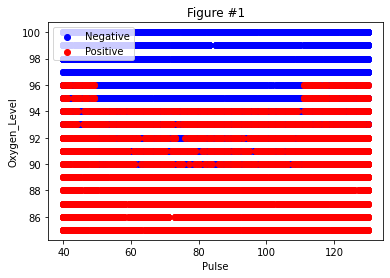

In [3]:
# This diagram shows how there is a clear linear separation between the oxygen levels and pulse rates of COVID-19 patients and healthy patients.
data_neg = data[data['Outcome']==0]
data_pos = data[data['Outcome']==1]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data_neg['Pulse'], data_neg['Oxygen_Level'], c='b', label='Negative')
ax1.scatter(data_pos['Pulse'], data_pos['Oxygen_Level'], c='r', label='Positive')
plt.legend(loc='upper left')
plt.xlabel('Pulse')
plt.ylabel('Oxygen_Level')
plt.title("Figure #1")
plt.show()

In [4]:
# Spliting the dataset by taking 50% training data and 50% test data

shuffled = data.sample(len(data))
train, test = shuffled.iloc[:len(data)//2].copy(), shuffled.iloc[len(data)//2:].copy()

# Logistic regression to get results for training data set
results = smf.logit('Outcome ~ Oxygen_Level + Pulse + Temperature', data = train).fit()
print(results.summary())



Optimization terminated successfully.
         Current function value: 0.177513
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                  0.7439
Time:                        19:19:09   Log-Likelihood:                -887.56
converged:                       True   LL-Null:                       -3465.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.0784      2.251     14.249      0.000      27.666      36.491
Oxygen_Level    -1.1565

In [5]:
# Predicting outcome based on probability of a positive result with a threshold of 0.5 for training set

train['probability_of_positive'] = (e**(31.3296 - 1.1190*train['Oxygen_Level'] + 0.0116*train['Pulse'] + 0.7135*train['Temperature'])) / (1 + e**(31.3296 - 1.1190*train['Oxygen_Level'] + 0.0116*train['Pulse'] + 0.7135*train['Temperature']))
train['Predicted_outcome'] = train.apply(lambda row: 1 if row.probability_of_positive > 0.5 else 0, axis = 1)
train

,Patient ID,Oxygen_Level,Pulse,Temperature,Outcome,probability_of_positive,Predicted_outcome
6667,6667,97,127,97,0,0.001456,0
1360,1360,87,110,104,1,0.999922,1
2203,2203,94,44,105,1,0.827997,1
4789,4789,90,74,98,0,0.802343,1
5698,5698,95,52,96,0,0.002798,0
...,...,...,...,...,...,...,...
545,545,87,128,96,1,0.981246,1
5092,5092,88,121,100,1,0.996357,1
4365,4365,89,51,98,1,0.904926,1
1770,1770,95,77,98,0,0.015380,0


In [6]:
# Using a confusion matrix to calculate accuracy, sensitivity and specificity for TRAINING set
cm = confusion_matrix(train[['Outcome']], train[['Predicted_outcome']])
print('Confusion Matrix (training set): \n', cm)
total1=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity1)

Confusion Matrix (training set): 
 [[2330  188]
 [ 195 2287]]
Accuracy :  0.9234

Sensitivity :  0.9214343271555198
Specificity :  0.9253375694996029


In [7]:
# Predicting outcome based on probability of a positive result with a threshold of 0.5 for test set

test['probability_of_positive'] = (e**(31.3296 - 1.1190*test['Oxygen_Level'] + 0.0116*test['Pulse'] + 0.7135*test['Temperature'])) / (1 + e**(31.3296 - 1.1190*test['Oxygen_Level'] + 0.0116*test['Pulse'] + 0.7135*test['Temperature']))
test['Predicted_outcome'] = test.apply(lambda row: 1 if row.probability_of_positive > 0.5 else 0, axis = 1)
test

,Patient ID,Oxygen_Level,Pulse,Temperature,Outcome,probability_of_positive,Predicted_outcome
6637,6637,93,97,102,1,0.762204,1
9525,9525,96,60,102,0,0.067774,0
8782,8782,93,105,100,0,0.457751,0
6353,6353,96,121,97,0,0.004147,0
213,213,96,121,101,1,0.067402,0
...,...,...,...,...,...,...,...
9686,9686,89,77,101,1,0.990945,1
3708,3708,94,92,96,0,0.013477,0
5719,5719,86,81,103,1,0.999927,1
4254,4254,87,78,97,1,0.983551,1


In [8]:
# Using a confusion matrix to calculate accuracy, sensitivity and specificity for TEST set

cm2 = confusion_matrix(test[['Outcome']], test[['Predicted_outcome']])
print('Confusion Matrix (TEST set): \n', cm2)
total2=sum(sum(cm2))

#####from confusion matrix calculate accuracy

accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('\nSensitivity : ', sensitivity2 )

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

Confusion Matrix (TEST set): 
 [[2280  212]
 [ 190 2318]]
Accuracy :  0.9196

Sensitivity :  0.9242424242424242
Specificity :  0.9149277688603531


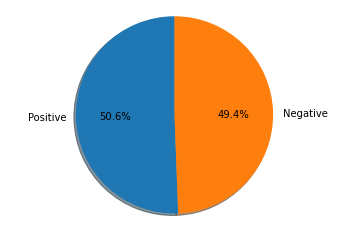

In [9]:
# Pie chart for test data
labels = 'Positive', 'Negative'
sizes = [len(test.loc[test['Predicted_outcome'] == 1]), len(test.loc[test['Predicted_outcome'] == 0])]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [10]:
## Cross validation using multiple regression
from sklearn import linear_model
X = train[['Oxygen_Level', 'Pulse','Temperature']]
y = train['Outcome']
regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_)

[-0.08341168  0.00072573  0.04043035]


In [11]:
oxygen = np.array(test['Oxygen_Level'])
pulse = np.array(test['Pulse'])
temp = np.array(test['Temperature'])
prob = []
for i in range(len(oxygen)):
    prob = prob + list(regr.predict([[oxygen[i], pulse[i], temp[i]]]))
test['probability_of_positive_regr'] = prob
test['Predicted_outcome_regr'] = test.apply(lambda row: 1 if row.probability_of_positive_regr > 0.5 else 0, axis = 1)
test

,Patient ID,Oxygen_Level,Pulse,Temperature,Outcome,probability_of_positive,Predicted_outcome,probability_of_positive_regr,Predicted_outcome_regr
6637,6637,93,97,102,1,0.762204,1,0.550250,1
9525,9525,96,60,102,0,0.067774,0,0.273162,0
8782,8782,93,105,100,0,0.457751,0,0.475195,0
6353,6353,96,121,97,0,0.004147,0,0.115280,0
213,213,96,121,101,1,0.067402,0,0.277002,0
...,...,...,...,...,...,...,...,...,...
9686,9686,89,77,101,1,0.990945,1,0.828951,1
3708,3708,94,92,96,0,0.013477,0,0.220627,0
5719,5719,86,81,103,1,0.999927,1,1.162950,1
4254,4254,87,78,97,1,0.983551,1,0.834779,1


In [12]:
cm3 = confusion_matrix(test[['Outcome']], test[['Predicted_outcome_regr']])
print('Confusion Matrix (TEST set): \n', cm3)
total3=sum(sum(cm3))

#####from confusion matrix calculate accuracy

accuracy3=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy3)

sensitivity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('\nSensitivity : ', sensitivity3 )

specificity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Specificity : ', specificity3)

Confusion Matrix (TEST set): 
 [[2289  203]
 [ 223 2285]]
Accuracy :  0.9148

Sensitivity :  0.9110845295055822
Specificity :  0.9185393258426966


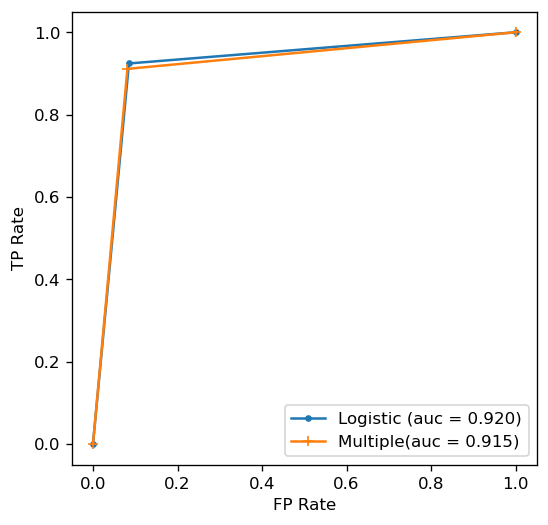

In [13]:
from sklearn.metrics import roc_curve, auc
logistic_fpr, logistic_tpr, threshold = roc_curve(test['Outcome'], test['Predicted_outcome'])
auc_logistic = auc(logistic_fpr, logistic_tpr)
regr_fpr, regr_tpr, threshold = roc_curve(test['Outcome'],test['Predicted_outcome_regr'])
auc_regr = auc(regr_fpr, regr_tpr)
plt.figure(figsize=(5, 5), dpi=120)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(regr_fpr, regr_tpr, marker='+', label='Multiple(auc = %0.3f)' % auc_regr)

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.legend()

# Results

According to the logistic regression summary, Oxygen_Level has a negative correlation (~ -1.1565) with the probability of detecting COVID-19 in a patient. This logically adds up since a low oxygen level is known to be an early indicator of COVID-19. Temperature has a positive correlation (~0.7411) with the probability of detecting COVID-19 which also makes sense since another common symptom of COVID-19 is a high fever. Pulse does not appear to have a strong correlation with the probability of detecting COVID-19 since its correlation is ~ 0.0111. Among the 3 predictors, Oxygen_Level has the largest impact on the probability of detecting COVID-19.

The two confusion matrices above show the results for the training set and the test set respectively. On first sight, it may appear that our model shows strong signs of overfitting due to the high accuracy achieved on both sets. However,The model will have to be evaluated on additional data sets to get a better sense of the performance of the logistic regression model. Since the test set and training set were extremely similar, it is difficult to make an assumption about the complexity and flexibility of the model used. 
The model achieved an accuracy of 91.96% on the test data with a sensitivity of 92.42% and a specificity of 91.49%. 

According to the multiple  regression summary, the correlation of Oxygen_Level, Pulse, Temperature with the probability of detecting COVID-19 in a patient is -0.08341168, 0.00072573 and 0.04043035 respectively. The confusion matrix of the test set shows that the multiple regression model is less accurate than the logistic regression model. The AUC of the logistic model is greater than the one of the multiple regression model.(Accuracy 91.48%, Sensitivity 91.11% and Specificity 91.85%)


# Discussion

The COVID-19 pandemic is an unprecedented threat to the health and well-being of human beings. In our study, we analyzed a large dataset of 10,000 sets of data, for which all the data are available to analyze. Despite the high accuracies we found for our test set, we believe that our results could still potentially be ambiguous since there is a chance that our model has overfit the data. So we consider it would be better to further improve our method using k-Fold CV to identify more valid coefficients for the predictors, because we trained 50% of the dataset we have, and we tested it with the remaining datasets. We will also need to perform additional tests using data from other sources to verify the efficacy of our model. We also plan on performing multiple regression and KNN to further investigate models which can better predict the chance of a patient having COVID-19 with just 3 predictors. 

Our model can be further improved by utilising more predictors such as weight, height, gender, and age which could also be key factors which can assist the model in making more accurate predictions. Using more predictors along with a regularization technique could result in the model achieving an even greater accuracy. 
